# Using Machine Learning to Classify Handwritten Digits

Things we know about the data:
#### - We have 10 digits.
#### - The images are black and white.
#### - Image size is 28 pixels by 28 pixels.

![Handwritten Digits](resources/MnistExamples.png "Handwritten Digits Example")*<p style="text-align: center;">Figure 1: Handwritten Digits Example</p>*

#### Let us start by downloading the data.

Change `<your-username>` to the username you created when registering for SciServer.

For example, my username is `'adi'`, so I will type `USERNAME = 'adi'`.

In [4]:
import torch
import torchvision

# change USERNAME to be your SciServer username.
USERNAME = 'adi'

# DO NOT CHANGE!
DOWNLOAD_FOLDER = '/home/idies/workspace/Temporary/' + USERNAME + '/scratch'

# MNIST is the name of the handwritten dataset.
dataset = torchvision.datasets.MNIST(DOWNLOAD_FOLDER, download=True, transform=torchvision.transforms.ToTensor())

Now that the dataset is downloaded, we can examine some of the images.

To do this, we will need to import a visualization library. We will use `matplotlib` in this tutorial.

In [ ]:
# import the visualization package.
import matplotlib.pyplot as plt
%matplotlib inline

# Create a DataLoader that will read the images we downloaded in the previous step.
data_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

# Read 10 images from the data_loader.
examples = enumerate(data_loader)
_, (example_data, example_labels) = next(examples)

# Print some information about the example_data we just read.
print(example_data.shape)

# Create a figure.
figure = plt.figure()

# Plot the 10 images contained in example_data.
for i in range(10):
    plt.subplot(3, 5, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()


# Setting up the machine learning model

In [1]:
import torch
import torch.nn as nn # This is the Neural Networks package. We use this to create our Machine Learning Models.

class SimpleModel(nn.Module):
    def __init__(self, input_dimension, output_dimension):
        super(SimpleModel, self).__init__()
        
        self.input_dimension = input_dimension
        self.linear_layer = nn.Linear(input_dimension, output_dimension)
        
    def forward(self, input_data):
        
        output = self.linear_layer(input_data.view(-1, self.input_dimension))
        #output = nn.functional.softmax(output, dim=-1)
        return output

In [2]:
# Set the dimensions
input_dimension = 28*28
output_dimension = 10

# Create the SimpleModel
model = None
model = SimpleModel(input_dimension, output_dimension)

# Print the model
print(model)

SimpleModel(
  (linear_layer): Linear(in_features=784, out_features=10, bias=True)
)


<img src="resources/mnist simple model.png" width="700" height="700" />

*<p style="text-align: center;">Figure 2: How the Simple Model Works</p>*

#### Now we are ready to train a simple machine learning model!



##### Exercises
1. Train the SimpleModel with the default settings. What can you say about the loss and accuracy?


2. Change the `BATCH_SIZE`. How does it affect loss, accuracy, and running time?

| Batch Size  |  Effect on Loss | Effect on Accuracy | Effect on Running Time |
:------------:|:--------------:|:-------------------:|:----------------------:|
10 (Default)  | 
1             |
5             |
20            |
40            |

3. Change the `LEARNING_RATE`. How does it affect loss, accuracy, and running time?

| Learning Rate  |  Effect on Loss | Effect on Accuracy | Effect on Running Time |
:---------------:|:--------------:|:-------------------:|:----------------------:|
0.001 (Default)  | 
0.01             |
0.1              |
1                |
0.0001           |


<IPython.core.display.Javascript object>


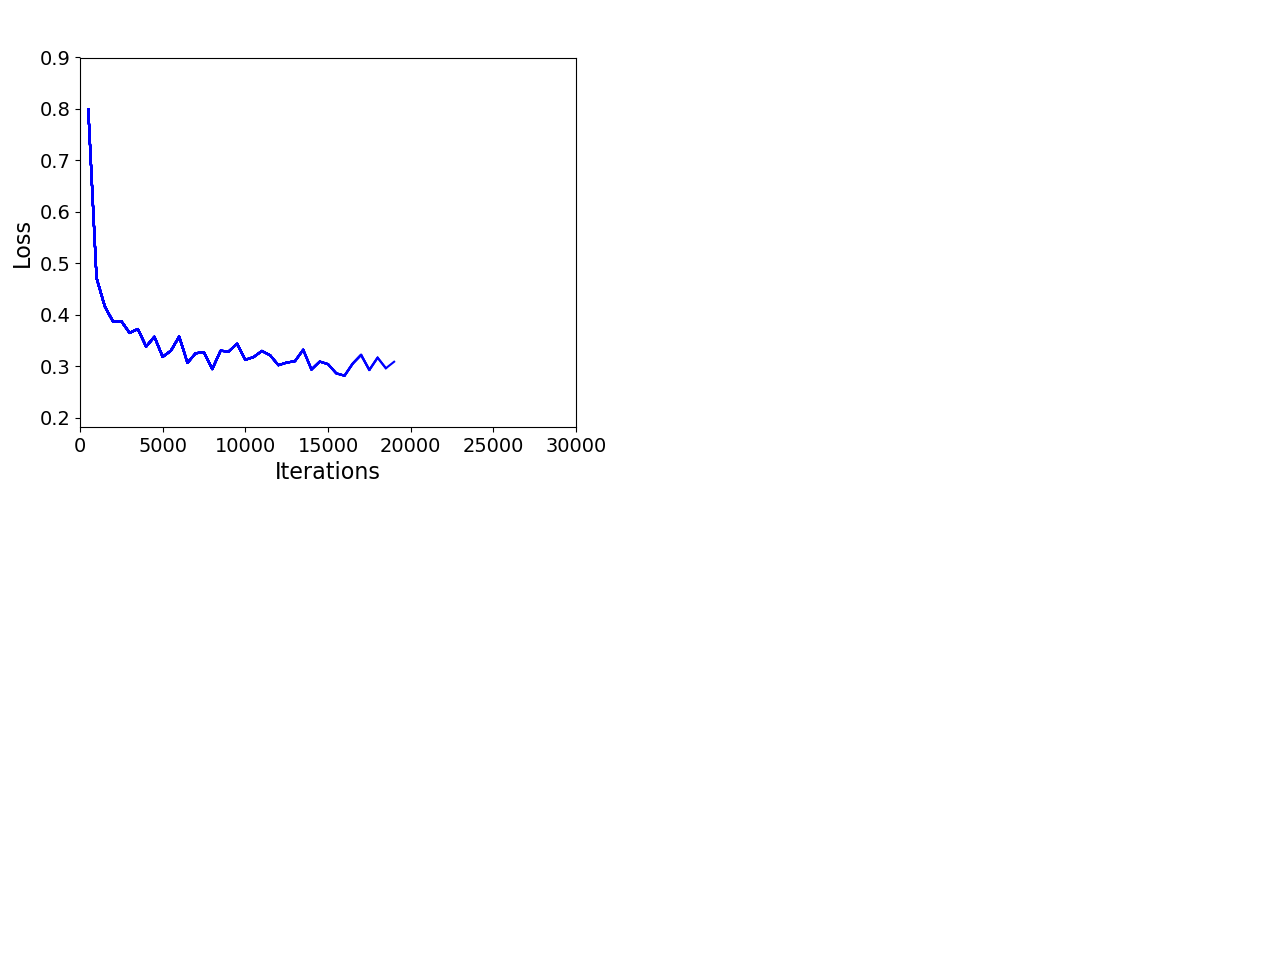

<IPython.core.display.Javascript object>


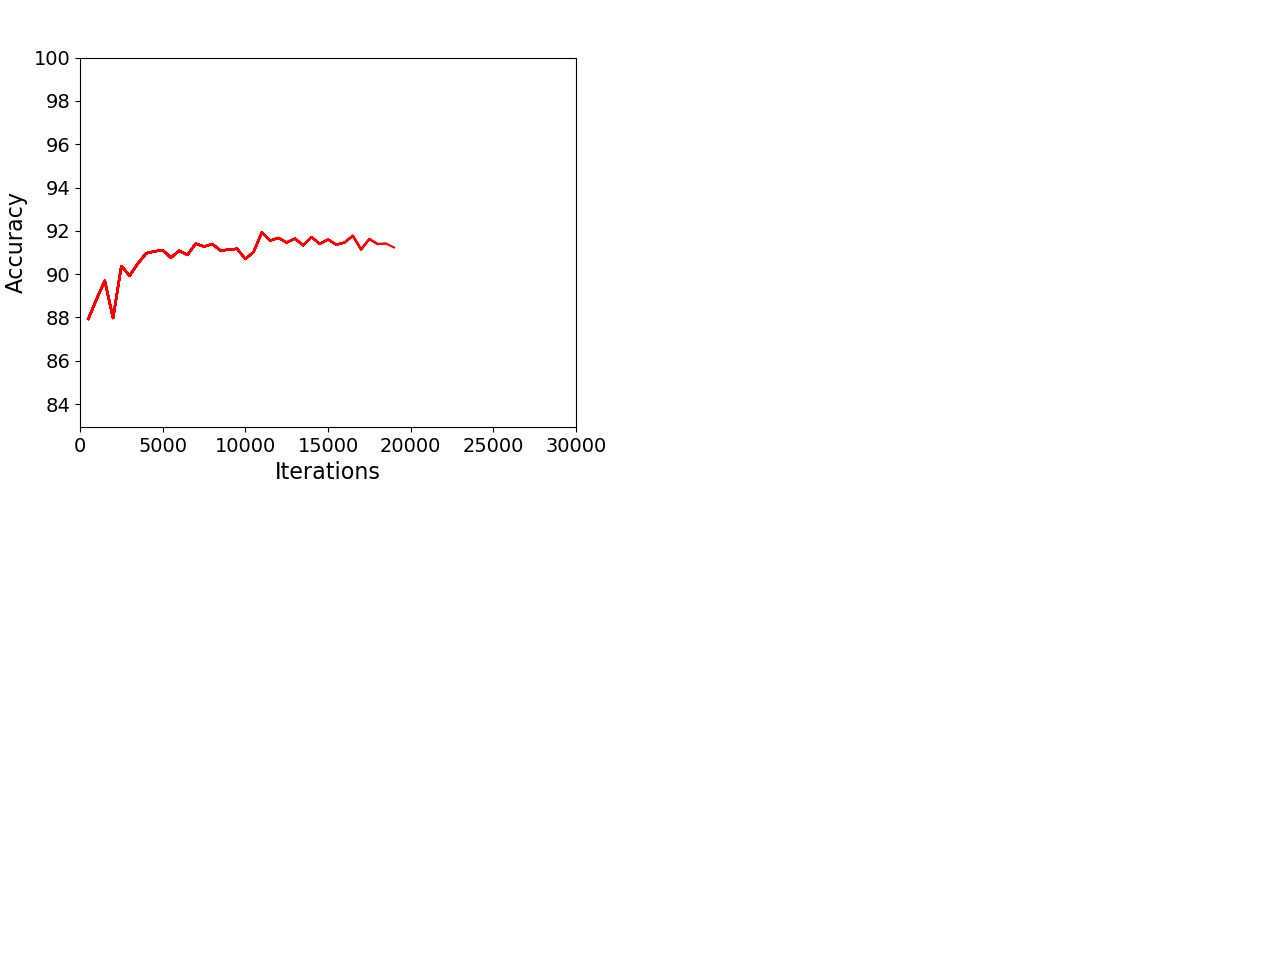

<IPython.core.display.Javascript object>


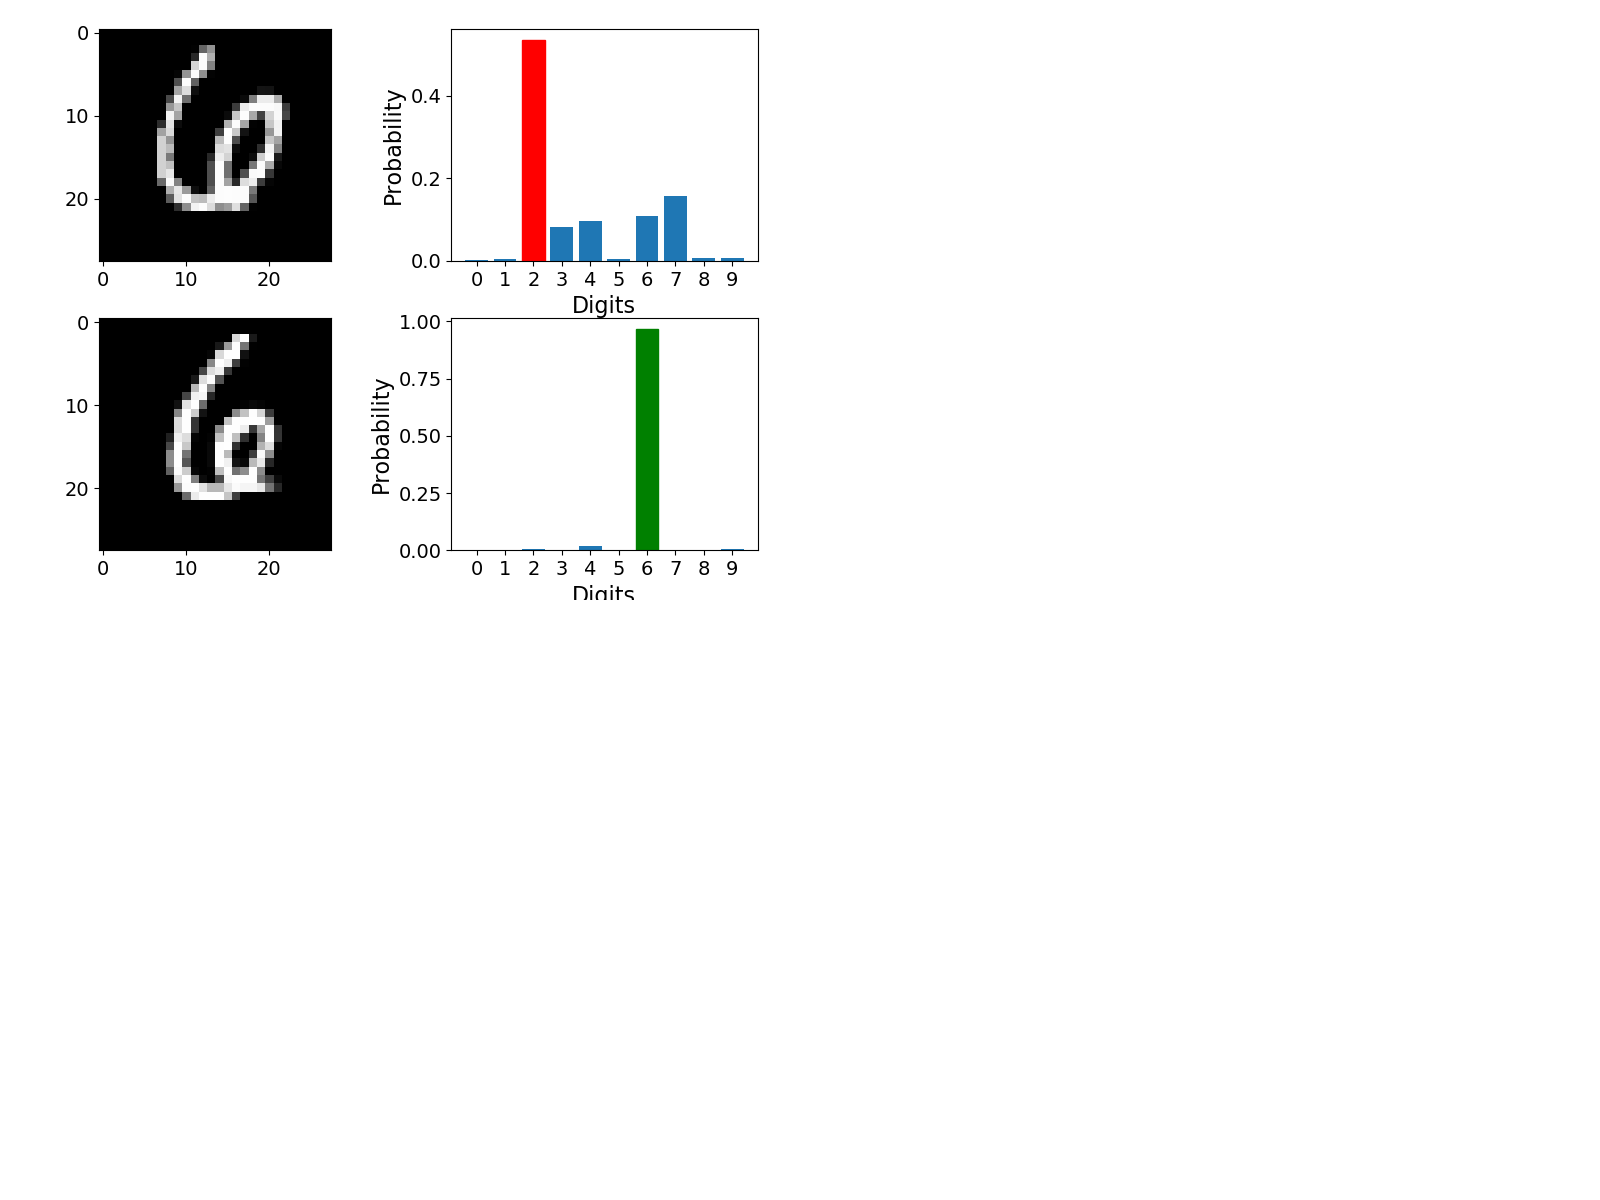

Elapsed Time: 9.39 sec, Iteration: 500, Loss: 0.799628, Accuracy: 87.93
Elapsed Time: 28.73 sec, Iteration: 1000, Loss: 0.471758, Accuracy: 88.84
Elapsed Time: 57.46 sec, Iteration: 1500, Loss: 0.416447, Accuracy: 89.69
Elapsed Time: 95.26 sec, Iteration: 2000, Loss: 0.386903, Accuracy: 87.97
Elapsed Time: 142.70 sec, Iteration: 2500, Loss: 0.387772, Accuracy: 90.37
Elapsed Time: 199.57 sec, Iteration: 3000, Loss: 0.365117, Accuracy: 89.93
Elapsed Time: 265.72 sec, Iteration: 3500, Loss: 0.372515, Accuracy: 90.49
Elapsed Time: 341.25 sec, Iteration: 4000, Loss: 0.338538, Accuracy: 90.96
Elapsed Time: 426.61 sec, Iteration: 4500, Loss: 0.357592, Accuracy: 91.05
Elapsed Time: 521.27 sec, Iteration: 5000, Loss: 0.318593, Accuracy: 91.11
Elapsed Time: 625.59 sec, Iteration: 5500, Loss: 0.330491, Accuracy: 90.76
Elapsed Time: 739.41 sec, Iteration: 6000, Loss: 0.357992, Accuracy: 91.08

Elapsed Time: 862.60 sec, Iteration: 6500, Loss: 0.307050, Accuracy: 90.89
Elapsed Time: 994.90 sec, Iter

In [ ]:
import time
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 21

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def plot_and_print():
    global cum_loss, model, loss_history, accuracy_history, elapsed_time
    global fig, ax, fig2, ax2, fig3, ax3
    
    plot_example = True
    total = 0
    correct = 0
    for (test_images, test_labels) in testing_loader:
        model.eval()
        outputs = model(test_images)
        _, model_prediction = torch.max(outputs.data, 1)
        total += test_labels.size(0)
        labels_diff = model_prediction == test_labels
        correct += labels_diff.sum().item()
        if plot_example:
            example_wrong_idxs = (labels_diff == 0).nonzero()
            example_correct_idxs = (labels_diff == 1).nonzero()
            
            if(len(example_wrong_idxs) == 0 or len(example_correct_idxs) == 0):
                plot_example = True
                continue;
            choice = np.random.randint(0, len(example_wrong_idxs))
            choice = example_wrong_idxs[choice].item()


            ax3[0][0].imshow(test_images[choice][0], cmap='gray',interpolation='none')
            ax3[0][1].cla()
            barlist = ax3[0][1].bar(np.arange(0,10), torch.nn.functional.softmax(outputs.data[choice], dim=-1).numpy())
            barlist[model_prediction[choice]].set_color('r')
            ax3[0][1].set_xticks(np.arange(0,10))
            ax3[0][1].set(xlabel='Digits', ylabel='Probability')
        
            choice = np.random.randint(0, len(example_correct_idxs))
            choice = example_correct_idxs[choice].item()


            ax3[1][0].imshow(test_images[choice][0], cmap='gray',interpolation='none')
            ax3[1][1].cla()
            barlist = ax3[1][1].bar(np.arange(0,10), torch.nn.functional.softmax(outputs.data[choice],dim=-1).numpy())
            barlist[model_prediction[choice]].set_color('g')
            ax3[1][1].set_xticks(np.arange(0,10))
            ax3[1][1].set(xlabel='Digits', ylabel='Probability')

            fig3.canvas.draw()
            plot_example = False
            
            #fig4,ax4 = plt.subplots(1,1)
            #print(test_images[example_correct_idx])
            #ax4.imshow(test_images[example_correct_idx], cmap='gray')


    accuracy = 100*(correct/total)
    loss_history.append(cum_loss/print_frequency)
    accuracy_history.append(accuracy)
            
    elapsed_time += time.time() - start
    print('Elapsed Time: %.2f sec, Iteration: %d, Loss: %f, Accuracy: %.2f' % (elapsed_time, iters, cum_loss/print_frequency, accuracy))
    xdata = np.arange(print_frequency,iters+1, print_frequency)
    ax.plot(xdata, loss_history, 'b-')
    ax.set_ylim(min(loss_history)-.1, max(loss_history)+.1)
    fig.canvas.draw()
    ax2.plot(xdata, accuracy_history, 'r-')
    ax2.set_ylim(min(accuracy_history)-5, 100)
    fig2.canvas.draw()
    cum_loss = 0


BATCH_SIZE = 10
LEARNING_RATE = 0.001
ITERATIONS = 5


model = None  
model = SimpleModel(input_dimension, output_dimension)

transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                             torchvision.transforms.Normalize((0.5,), (0.5,))])


# The SimpleModel needs to be trained on data so that it can learn the different digits.
training_dataset = torchvision.datasets.MNIST(DOWNLOAD_FOLDER, train=True, transform=transforms)
training_loader =  torch.utils.data.DataLoader(training_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Testing data will help us see how good the SimpleModel is at classifying digits. 
testing_dataset = torchvision.datasets.MNIST(DOWNLOAD_FOLDER, train=False, transform=transforms)
testing_loader = torch.utils.data.DataLoader(testing_dataset, batch_size = 128, shuffle=False)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LEARNING_RATE, momentum=0.9)

iters = 0
cum_loss = 0
print_frequency = 500
elapsed_time = 0

loss_history = []
accuracy_history = []

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_xlim(0,len(training_loader)*ITERATIONS)

fig2, ax2 = plt.subplots(1,1)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(0,len(training_loader)*ITERATIONS)

fig3, ax3 = plt.subplots(2,2, figsize=(8,6))
fig3.tight_layout()
    
cum_loss = 0
start = time.time()
for i in range(ITERATIONS):
    for j , (images, labels) in enumerate(training_loader):
        model.train()
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        cum_loss += loss.item()
        optimizer.step()
        iters += 1
        if iters % print_frequency == 0:
            plot_and_print()
            cum_loss = 0
    print('')
    
print('Best Accuracy: %.2f' % max(accuracy_history))
print('Best Loss: %f' % min(loss_history))
print('Elapsed Running Time: %.2f' % elapsed_time)

#### Now that we have trained the SimpleModel, let us try a more complicated model called a Neural Network.


In [ ]:
import torch
import torch.nn as nn # This is the Neural Networks package. We use this to create our Machine Learning Models.

class SimpleNeuralNetworkModel(nn.Module):
    def __init__(self, layer_dimensions):
        super(SimpleNeuralNetworkModel, self).__init__()
        
        self.layer_dimensions = layer_dimensions
        self.layers = []
        for i in range(len(layer_dimensions)-1):
            self.layers.append(nn.Linear(layer_dimensions[i], layer_dimensions[i+1]))
        
        self.layers = nn.ModuleList(self.layers)
        self.activation_function = nn.ReLU()
        
    def forward(self, input_data):
        input_data = input_data.view(-1, self.layer_dimensions[0])
        for layer in self.layers:
            output = self.activation_function(layer(input_data))
            input_data = output
        #output = nn.functional.softmax(output, dim=-1)
        return output

<img src="resources/mnist fcn.png" width="700" height="700" />

*<p style="text-align: center;">Figure 3: How the Simple Neural Network Model Works</p>*

<img src="resources/mnist fcn connected.png" width="700" height="700" />

*<p style="text-align: center;">Figure 4: How are the nodes connected?</p>*

##### Exercises
1. Train the SimpleNeuralNetworkModel with the default settings. What can you say about the loss and accuracy? How does it compare to the SimpleModel?


2. Change the BATCH_SIZE. How does it affect loss, accuracy, and running time?

| Batch Size  |  Effect on Loss | Effect on Accuracy | Effect on Running Time |
:------------:|:--------------:|:-------------------:|:----------------------:|
10 (Default)  | 
1             |
5             |
20            |
40            |

3. Change the LEARNING_RATE. How does it affect loss, accuracy, and running time?

| Learning Rate  |  Effect on Loss | Effect on Accuracy | Effect on Running Time |
:---------------:|:--------------:|:-------------------:|:----------------------:|
0.001 (Default)  | 
0.01             |
0.1              |
1                |
0.0001           |


4. Add more layers to the Simple Neural Network Model by adding a dimension to `layer_dimensions`. How does this affect loss, accuracy, and running time?

    Example: Add a `64`-dimensional layer to `layer_dimensions`. Result should look like this: `layer_dimensions = [28*28, 64, 64, 10]`.

In [ ]:
model = None

# # Do Not Change or Delete 28*28 and 10.
layer_dimensions = [28*28, 500, 500, 10]
model = SimpleNeuralNetworkModel(layer_dimensions)
print(model)

In [ ]:
import time
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

BATCH_SIZE = 10
LEARNING_RATE = 0.01
ITERATIONS = 5
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize((0.5,), (0.5,))])

# The SimpleNeuralNetworkModel needs to be trained on data so that it can learn the different digits.
training_dataset = torchvision.datasets.MNIST(DOWNLOAD_FOLDER, train=True, transform=transforms)
training_loader =  torch.utils.data.DataLoader(training_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Testing data will help us see how good the SimpleModel is at classifying digits. 
testing_dataset = torchvision.datasets.MNIST(DOWNLOAD_FOLDER, train=False, transform=transforms)
testing_loader = torch.utils.data.DataLoader(testing_dataset, batch_size = 1000, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LEARNING_RATE, momentum=0.9)

iters = 0
cum_loss = 0
print_frequency = 500
elapsed_time = 0

loss_history = []
accuracy_history = []

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_xlim(0,len(training_loader)*ITERATIONS)
ax.set_ylim(0, 1.5)

fig2, ax2 = plt.subplots(1,1)
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Accuracy')
ax2.set_xlim(0,len(training_loader)*ITERATIONS)
ax2.set_ylim(65, 100)

fig3, ax3 = plt.subplots(2,2, figsize=(8,6))
fig3.tight_layout()

start = time.time()
for i in range(ITERATIONS):
    total = 0
    correct = 0
    for j , (images, labels) in enumerate(training_loader):
        model.train()
        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        cum_loss += loss.item()
        
        optimizer.step()
        iters += 1

        if iters % print_frequency == 0:
            plot_and_print()
            cum_loss = 0
    print('')
    
print('Best Accuracy: %.2f' % max(accuracy_history))
print('Best Loss: %f' % min(loss_history))
print('Elapsed Running Time: %.2f' % elapsed_time)